The `Boxplots`class offers a simple interface for creating boxplots to compare different models, observational datasets, and variables

In [1]:
from aqua.diagnostics import Boxplots, PlotBoxplots

/LUMI_TYKKY_eZ1frzx/miniconda/envs/env1/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


As an example, we will plot the net long-wave and top net short-wave radiation fluxes at the top of the atmosphere for the IFS-NEMO historical experiment, comparing the results with ERA5 and CERES climatologies.
We start by retrieving the data and computing the fieldmeans of the required variables.

In [2]:
variables  = ['-tnlwrf', 'tnswrf']

boxplots = Boxplots(model = 'IFS-NEMO', exp ='historical-1990', source = 'lra-r100-monthly')
boxplots.run(var=variables)

boxplots_era5 = Boxplots(model = 'ERA5', exp ='era5', source = 'monthly')
boxplots_era5.run(var=variables)

boxplots_ceres = Boxplots(model = 'CERES', exp ='ebaf-toa41', source = 'monthly',  regrid='r100')
boxplots_ceres.run(var=variables)



2025-07-25 17:47:08 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-07-25 17:47:08 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-07-25 17:47:19 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-07-25 17:47:19 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data


The field means of the retrieved variables are stored as attributes of the `Boxplots` class. They can be optionally saved as NetCDF files by setting the `save_netcdf=True` flag during the class initialization.



In [3]:
boxplots.fldmeans

<xarray.Dataset> Size: 4kB
Dimensions:  (time: 146)
Coordinates:
  * time     (time) datetime64[ns] 1kB 1990-01-01 1990-02-01 ... 2002-02-01
Data variables:
    tnlwrf   (time) float64 1kB dask.array<chunksize=(12,), meta=np.ndarray>
    tnswrf   (time) float64 1kB dask.array<chunksize=(12,), meta=np.ndarray>
Attributes:
    catalog:    climatedt-phase1
    model:      IFS-NEMO
    exp:        historical-1990
    startdate:  1990-01-01T00:00:00.000000000
    enddate:    2002-02-01T00:00:00.000000000

Let's now produce the boxplot throught `plot_boxplots` method of the class `PlotBoxplots`. 
The method requires in input the list of dataset(s) and reference dataset(s) containing the fldmeans of the variables to plot.


2025-07-25 17:56:50 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-07-25 17:56:50 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/caprioli/.aqua
2025-07-25 17:56:50 :: ConfigPath :: DEBUG    -> Configuration file found in /users/caprioli/.aqua/config-aqua.yaml
2025-07-25 17:56:50 :: ConfigPath :: DEBUG    -> Catalog found in /users/caprioli/.aqua/config-aqua.yaml file are ['ci', 'climatedt-phase1', 'climatedt-o25.1', 'obs']
2025-07-25 17:56:50 :: ConfigPath :: DEBUG    -> Available catalogs are ['ci', 'climatedt-phase1', 'climatedt-o25.1', 'obs']
2025-07-25 17:56:50 :: ConfigPath :: DEBUG    -> Default catalog will be ci
2025-07-25 17:56:50 :: ConfigPath :: DEBUG    -> Catalog file is /users/caprioli/.aqua/catalogs/ci/catalog.yaml
2025-07-25 17:56:50 :: ConfigPath :: DEBUG    -> Machine file is /users/caprioli/.aqua/catalogs/ci/machine.yaml
2025-07-25 17:56:50 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to lumi
2025-07-25 17:5

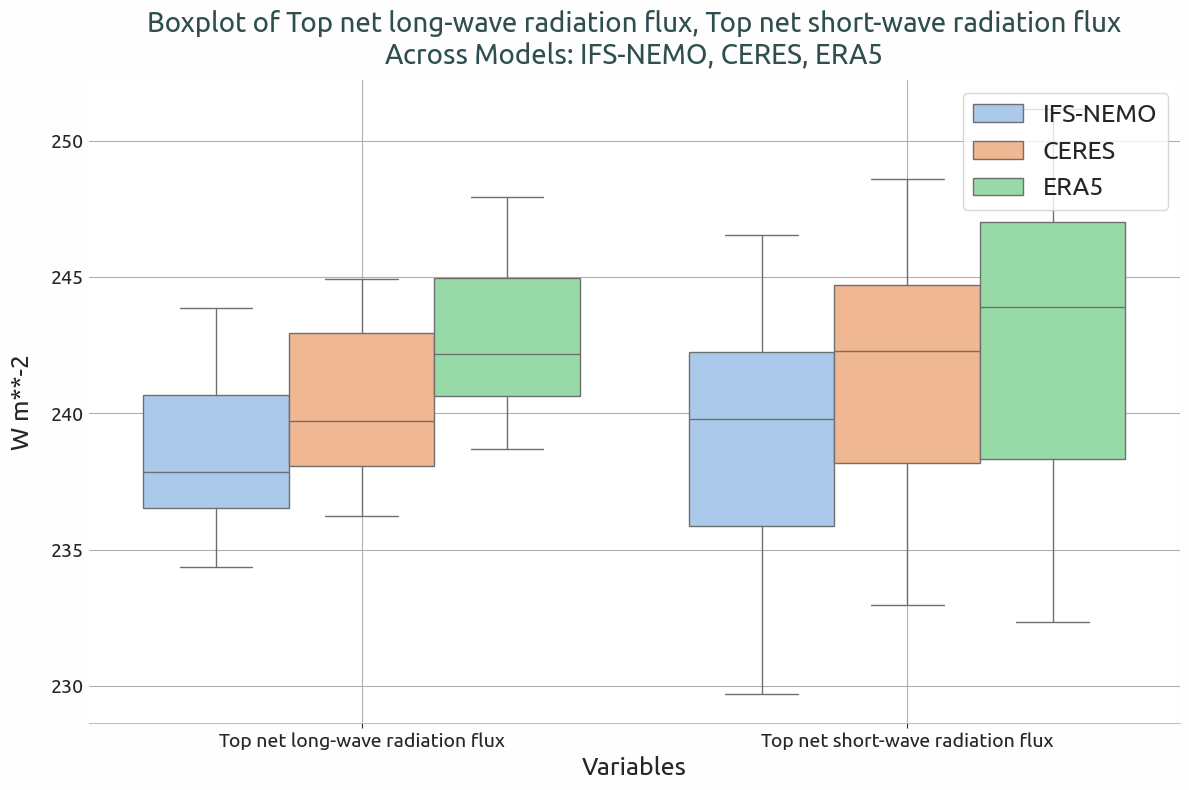

In [5]:
datasets = [boxplots.fldmeans]
datasets_ref = [boxplots_ceres.fldmeans, boxplots_era5.fldmeans]

plot = PlotBoxplots(diagnostic='radiation', save_png=True, save_pdf=False, loglevel='DEBUG')
plot.plot_boxplots(data=datasets, data_ref=datasets_ref, var=variables)